In [1]:
import pandas as pd
import numpy as npb
import os
from sklearn.preprocessing import StandardScaler
from google.colab import files

# 1. Tự động kiểm tra và Upload file
if not os.path.exists('Sample - Superstore.csv'):
    print("⚠️ Chưa thấy file dữ liệu. Vui lòng bấm nút bên dưới để upload file 'Sample - Superstore.csv'!")
    uploaded = files.upload()
else:
    print("✅ Đã tìm thấy file dữ liệu!")

# 2. Đọc dữ liệu
try:
    df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')
except:
    df = pd.read_csv('Sample - Superstore.csv')

⚠️ Chưa thấy file dữ liệu. Vui lòng bấm nút bên dưới để upload file 'Sample - Superstore.csv'!


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
import datetime

current_date = max(df['Order Date']) + datetime.timedelta(days=1)


In [6]:

# 1. Gom toàn bộ dữ liệu theo từng khách hàng.
#Mỗi customer trở thành 1 nhóm.
g = df.groupby("Customer ID")

# 2. Lấy ngày mua gần nhất của mỗi khách (max()),
# rồi tính: current_date – ngày gần nhất → số ngày không mua hàng.
recency = (current_date - g['Order Date'].max()).dt.days

# 3. Đếm số đơn hàng của từng khách.
#(= số dòng có cùng Customer ID)
frequency = g['Order ID'].count()

# 4. Monetary: tổng tiền khách đã chi
monetary = g['Sales'].sum()


df_customer = pd.DataFrame({
    'Customer ID': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

df_customer.head()


,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,11,5563.560
1,AA-10375,20,15,1056.390
2,AA-10480,260,12,1790.512
3,AA-10645,56,18,5086.935
4,AB-10015,416,6,886.156


In [7]:
#Các dữ liệu không đc Scale về cùng khoảng giống nhau
# Xem phân phối dữ liệu như nào

/tmp/ipython-input-2447510611.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer['Recency'], ax=ax[0])
/tmp/ipython-input-2447510611.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer['Frequency'], ax=ax[1])
/tmp/ipython-input-2447510611.py:8: UserWarning: 

`distplot` 

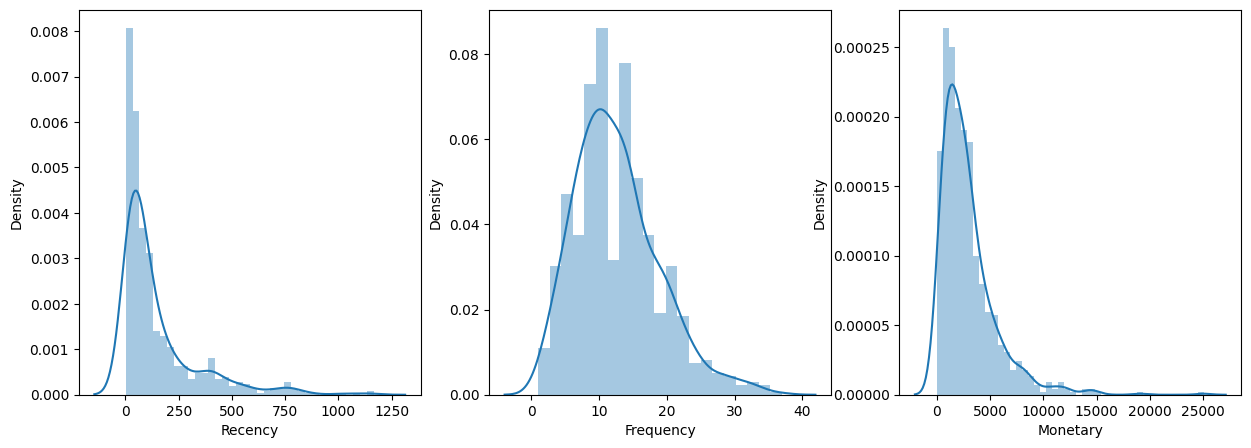

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df_customer['Recency'], ax=ax[0])
sns.distplot(df_customer['Frequency'], ax=ax[1])
sns.distplot(df_customer['Monetary'], ax=ax[2])

plt.show()


In [9]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    sns.distplot(df_customer[x], ax=ax[0,0])
    sns.distplot(np.log(df_customer[x] + 1), ax=ax[0,1])  # tránh log(0)
    sns.distplot(np.sqrt(df_customer[x]), ax=ax[1,0])

    bc_data, bc_lambda = stats.boxcox(df_customer[x] + 1)  # tránh lỗi boxcox
    sns.distplot(bc_data, ax=ax[1,1])

    plt.tight_layout()
    plt.show()

    print("Skew original:", df_customer[x].skew().round(2))
    print("Skew log:", np.log(df_customer[x] + 1).skew().round(2))
    print("Skew sqrt:", np.sqrt(df_customer[x]).skew().round(2))
    print("Skew boxcox:", pd.Series(bc_data).skew().round(2))


In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")
sns.set_palette("Blues_r")

def analyze_cbrt_monetary(df, col='Monetary'):
    # Tạo dữ liệu transform bằng căn bậc 3
    data_original = df[col]
    data_cbrt = np.cbrt(df[col])

    # Vẽ biểu đồ
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Trước transform
    sns.distplot(data_original, ax=ax[0])
    ax[0].set_title("Phân phối gốc (Original)")

    # Sau transform (CBRT)
    sns.distplot(data_cbrt, ax=ax[1])
    ax[1].set_title("Phân phối sau khi transform (CBRT)")

    plt.tight_layout()
    plt.show()

    # In skewness
    print("📌 Skewness so sánh:")
    print("Skew original:", data_original.skew().round(2))
    print("Skew CBRT:", pd.Series(data_cbrt).skew().round(2))


/tmp/ipython-input-3150364301.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_original, ax=ax[0])
/tmp/ipython-input-3150364301.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cbrt, ax=ax[1])


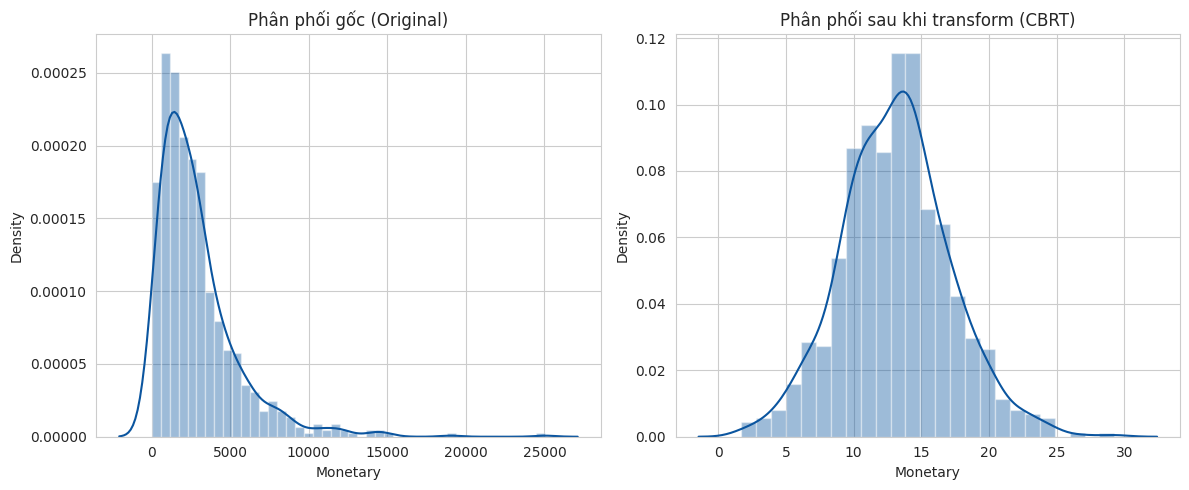

📌 Skewness so sánh:
Skew original: 2.48
Skew CBRT: 0.2


In [11]:
analyze_cbrt_monetary(df_customer, 'Monetary')


/tmp/ipython-input-3896010351.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer[x], ax=ax[0,0])
/tmp/ipython-input-3896010351.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_customer[x] + 1), ax=ax[0,1])  # tránh log(0)
/tmp/ipython-input-3896010351.py:12: UserWarni

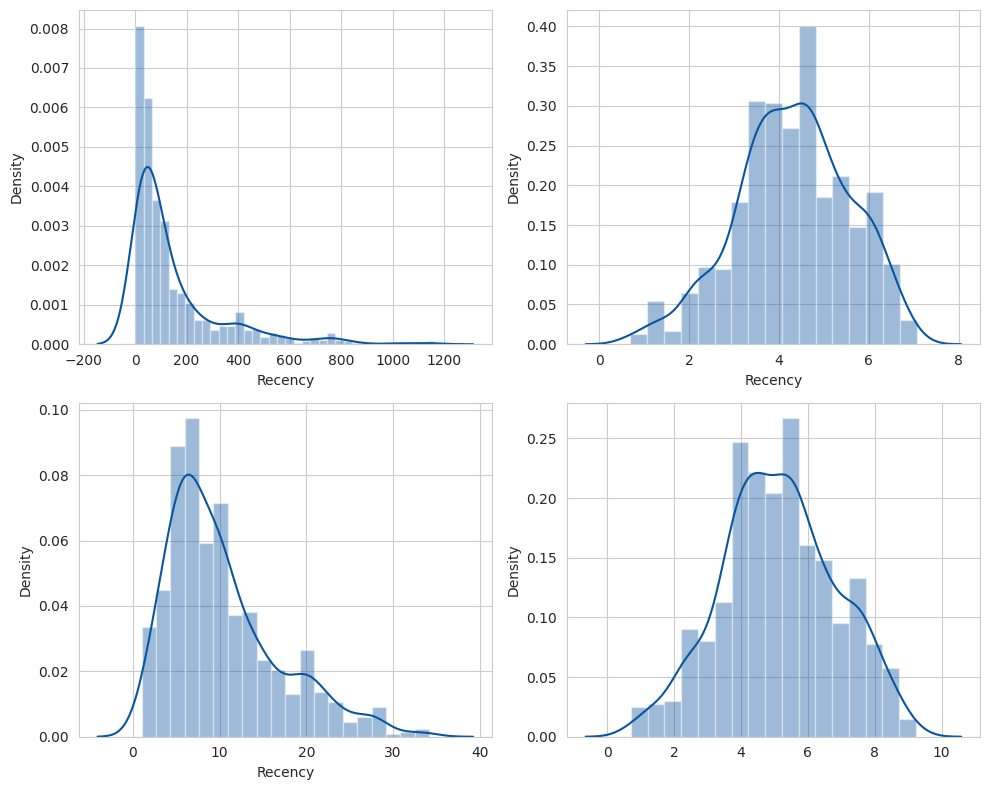

Skew original: 2.28
Skew log: -0.24
Skew sqrt: 1.11
Skew boxcox: -0.01


In [12]:
analyze_skewness('Recency')

/tmp/ipython-input-3896010351.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer[x], ax=ax[0,0])
/tmp/ipython-input-3896010351.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_customer[x] + 1), ax=ax[0,1])  # tránh log(0)
/tmp/ipython-input-3896010351.py:12: UserWarni

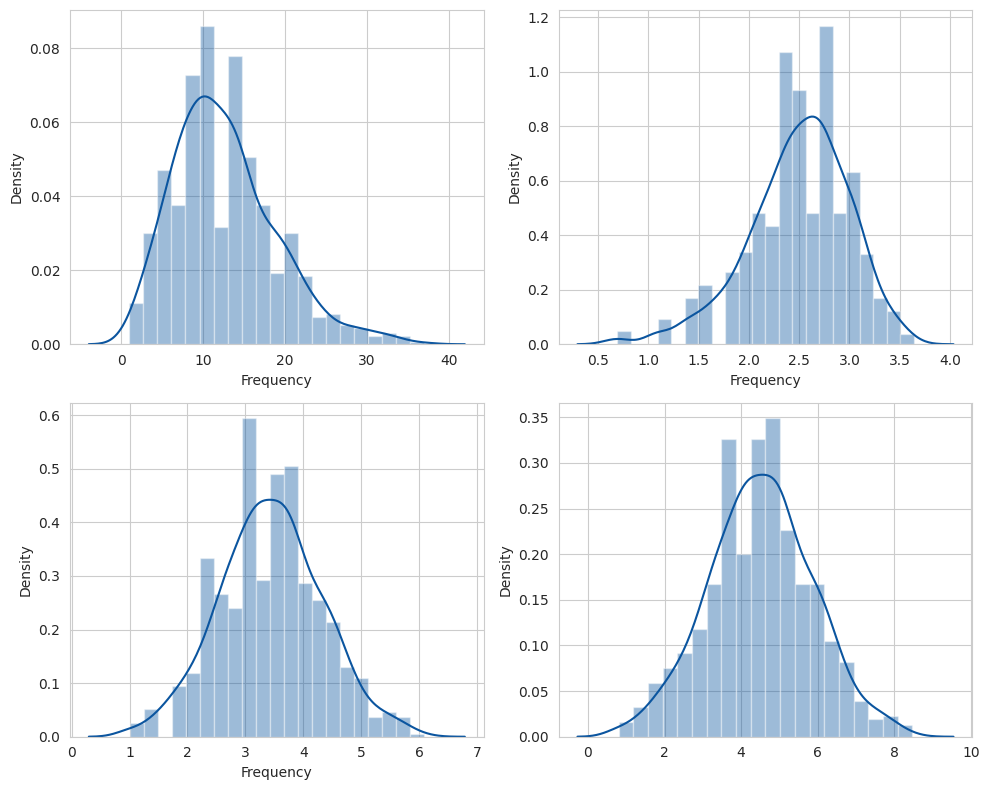

Skew original: 0.77
Skew log: -0.65
Skew sqrt: 0.03
Skew boxcox: -0.01


In [13]:
analyze_skewness('Frequency')

In [14]:
from scipy import stats
import numpy as np
import pandas as pd

df_customer_tranform = pd.DataFrame()

# Recency Box-Cox
df_customer_tranform['Recency'] = stats.boxcox(df_customer['Recency'] + 1)[0]

# Frequency Box-Cox
df_customer_tranform['Frequency'] = stats.boxcox(df_customer['Frequency'] + 1)[0]

# Monetary dùng căn bậc 3
df_customer_tranform['Monetary'] = np.cbrt(df_customer['Monetary'])
print("Skew Monetary sau transform:",
      df_customer_tranform['Monetary'].skew().round(2))



Skew Monetary sau transform: 0.2


In [15]:
df_customer_tranform.head()

,Recency,Frequency,Monetary
0,6.357624,4.339329,17.719478
1,3.407935,5.193089,10.184540
2,6.859206,4.566765,12.142993
3,4.700336,5.753722,17.198295
4,7.573643,2.989094,9.605133


In [16]:
#Tien hanh Scale du lieu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_customer_tranform)
df_customer_tranform_scale = scaler.transform(df_customer_tranform)
df_customer_tranform_scale

array([[ 0.71161452, -0.12748937,  1.15195953],
       [-1.00948719,  0.49908045, -0.73313277],
       [ 1.00428061,  0.03942526, -0.24316664],
       ...,
       [-1.46940663,  0.03942526,  1.44009544],
       [-0.26923903,  2.3534606 ,  1.72785474],
       [ 0.79070194, -0.48767898, -0.42111399]])

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd



mean_values = df_customer_tranform.mean()         # tính mean cho từng cột (Recency, Frequency, Monetary)

std_values  = df_customer_tranform.std(ddof=0)    # tính std cho từng cột, ddof=0 -> chia cho N (chuẩn như StandardScaler)

df_scale_manual = (df_customer_tranform - mean_values) / std_values

# -> sau khi scale: mỗi cột sẽ có mean ≈ 0, std ≈ 1

print("\n--- MANUAL ---")
print(df_scale_manual.head())



--- MANUAL ---
    Recency  Frequency  Monetary
0  0.711615  -0.127489  1.151960
1 -1.009487   0.499080 -0.733133
2  1.004281   0.039425 -0.243167
3 -0.255390   0.910526  1.021570
4  1.421145  -1.118419 -0.878089


In [18]:
df_customer_tranform_scale = pd.DataFrame(df_customer_tranform_scale, columns=df_customer_tranform.columns)
df_customer_tranform_scale.head()

,Recency,Frequency,Monetary
0,0.711615,-0.127489,1.151960
1,-1.009487,0.499080,-0.733133
2,1.004281,0.039425,-0.243167
3,-0.255390,0.910526,1.021570
4,1.421145,-1.118419,-0.878089


In [19]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# ... (giữ nguyên phần định nghĩa euclidean_distance và kmeans_simple ở trên)

X = np.asarray(df_customer_tranform_scale)   # dữ liệu đầu vào (đã scale)

sse = {}
sil_scores = {}

for K in range(2, 11):  # Silhouette chỉ có ý nghĩa khi K >= 2
    labels, centroids, sse_k = kmeans_simple(X, K)
    sse[K] = sse_k

    # Tính Silhouette Score cho K hiện tại
    sil_k = silhouette_score(X, labels)
    sil_scores[K] = sil_k

    print(f"K = {K}, SSE = {sse_k:.2f}, Silhouette = {sil_k:.4f}")

# Vẽ Elbow (SSE)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow method (KMeans code chay)")
plt.show()

# Vẽ Silhouette theo K
plt.figure()
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette theo số cụm K")
plt.show()


NameError: name 'kmeans_simple' is not defined

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_customer_tranform_scale)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow method for KMeans")
plt.show()


In [ ]:
# Phân cụm
model = KMeans(n_clusters=3, random_state=0)
model.fit(df_customer_tranform_scale)
df_customer['Cluster'] = model.labels_



In [ ]:
# Phân cụm
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_customer_tranform_scale)
df_customer['Cluster'] = model.labels_

df_customer.head(10)

df_customer.to_csv("rfm_customer_clusters.csv", index=False)



In [ ]:
# Phân cụm
model = KMeans(n_clusters=5, random_state=0)
model.fit(df_customer_tranform_scale)
df_customer['Cluster'] = model.labels_

df_customer.head(10)

df_customer.to_csv("rfm_customer_clusters.csv", index=False)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(centroids, centroids)

df_dist = pd.DataFrame(
    dist_matrix,
    columns=[f"Cluster_{i}" for i in range(len(centroids))],
    index=[f"Cluster_{i}" for i in range(len(centroids))]
)

df_dist = df_dist.applymap(lambda x: f"{x:.2f}")

df_dist


In [ ]:
df_customer.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean']
}).round(1)

Cụm 0: Mới mua gần đây, mua khá nhiều, Mua số tiền tương đối

Cụm 1: Khá lâu không mua, Số lượt mua rất nhiều, chi rất nhiều tiền

Cụm 2: Lâu rồi không mua, Số lượt mua ít, Chi ít tiền

In [ ]:
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters=k, random_state=0)
labels = model.fit_predict(df_customer_tranform_scale)

df_customer['Cluster'] = labels


In [ ]:
import plotly.express as px

df_plot = pd.DataFrame(df_customer_tranform_scale,
                       columns=['Recency','Frequency','Monetary'])
df_plot['Cluster'] = labels

fig = px.scatter_3d(
    df_plot,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color=df_plot['Cluster'].astype(str)
)

# Giảm kích thước marker
fig.update_traces(marker=dict(size=4))

fig.show()
fig.write_html("rfm_3d_plot.html")
from google.colab import files
files.download("rfm_3d_plot.html")




In [ ]:
# Số khách hàng trong mỗi cụm
cluster_size = df_customer['Cluster'].value_counts().sort_index()
print("Số khách hàng mỗi cụm:")
print(cluster_size)


In [ ]:
rfm_cols = ['Recency', 'Frequency', 'Monetary']

cluster_summary = (
    df_customer
    .groupby('Cluster')
    .agg({
        'Customer ID': 'nunique',   # số khách
        'Recency': ['mean', 'median', 'min', 'max'],
        'Frequency': ['mean', 'median', 'min', 'max'],
        'Monetary': ['mean', 'median', 'min', 'max']
    })
)

cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.reset_index()

print("Tóm tắt RFM theo cụm (dữ liệu gốc):")
cluster_summary


In [ ]:
# Trung bình toàn bộ
overall_mean = df_customer[rfm_cols].mean()

# Trung bình theo cụm
cluster_mean = df_customer.groupby('Cluster')[rfm_cols].mean()

# Lift = mean cụm / mean toàn bộ
cluster_lift = cluster_mean.divide(overall_mean)

print("Trung bình RFM theo cụm:")
print(cluster_mean)

print("\nLift ( >1 là cao hơn trung bình, <1 là thấp hơn):")
print(cluster_lift)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(
    cluster_lift,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd"
)
plt.title("Lift RFM theo từng cụm (>1: cao hơn trung bình)")
plt.ylabel("Cluster")
plt.show()
